<a href="https://colab.research.google.com/github/karlex7/ANN_bitcoin_trading_bot/blob/main/Zavrsni_rad_Karlo_Hren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of bitcoin price movment with Artificial Neural Network

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Data Quality Analysis

In [216]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/BITFINEX_BTCUSD, 240.csv')
data.head()

,time,open,high,low,close,Volume,Volume MA,MA,MA.1,MA.2,MA.3,RSI,K,D
0,2018-09-30T08:00:00Z,6584.4,6662.8,6576.000000,6631.7,NaN,NaN,6643.026619,6591.908333,6579.169969,6599.998605,54.260034,30.767330,28.144363
1,2018-09-30T12:00:00Z,6633.9,6658.0,6586.300000,6608.8,NaN,NaN,6641.422119,6589.572333,6591.397894,6601.758884,51.951369,42.248441,33.161281
2,2018-09-30T16:00:00Z,6607.4,6635.0,6589.919971,6606.0,NaN,NaN,6639.276619,6588.290333,6598.953449,6602.607107,51.661929,52.574710,41.863494
3,2018-09-30T20:00:00Z,6606.0,6645.0,6529.600000,6622.4,NaN,NaN,6637.119119,6586.918333,6602.553449,6606.565686,53.302977,60.988082,51.937078
4,2018-10-01T00:00:00Z,6622.3,6660.0,6621.800000,6645.0,NaN,NaN,6634.859119,6585.226333,6607.353449,6614.252549,55.542848,74.836135,62.799643


In [217]:
data.shape

(3591, 14)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       3591 non-null   object 
 1   open       3591 non-null   float64
 2   high       3591 non-null   float64
 3   low        3591 non-null   float64
 4   close      3591 non-null   float64
 5   Volume     0 non-null      float64
 6   Volume MA  0 non-null      float64
 7   MA         3591 non-null   float64
 8   MA.1       3591 non-null   float64
 9   MA.2       3591 non-null   float64
 10  MA.3       3591 non-null   float64
 11  RSI        3591 non-null   float64
 12  K          3591 non-null   float64
 13  D          3591 non-null   float64
dtypes: float64(13), object(1)
memory usage: 392.9+ KB


 1.   time - Time of the recorded price

---

 2.  open - Open price
 
---


 3.   high - Highest price
 
---


 4.  low - Lowest price
 
---


 5.  close - Closed price
 
---


 6.  MA - Exponential moving average 9
 
---


 7.  MA.1 - Moving average 9
 
---


 8.  MA.2 - Moving average 50
 
---


 9.  MA.3 - Moving average 200
 
---


 10.  RSI - Relative strength index
 
---


 11. K - Stoch RSI K index
 
---


 12. D - Stoch RSI D index

### 1.1. Missing values

In [219]:
data.isnull().sum()

time            0
open            0
high            0
low             0
close           0
Volume       3591
Volume MA    3591
MA              0
MA.1            0
MA.2            0
MA.3            0
RSI             0
K               0
D               0
dtype: int64

Columns Volume and Volume MA contain no value so we can drop them

In [220]:
data[['time', 'open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D']].head()

,time,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
0,2018-09-30T08:00:00Z,6584.4,6662.8,6576.000000,6631.7,6643.026619,6591.908333,6579.169969,6599.998605,54.260034,30.767330,28.144363
1,2018-09-30T12:00:00Z,6633.9,6658.0,6586.300000,6608.8,6641.422119,6589.572333,6591.397894,6601.758884,51.951369,42.248441,33.161281
2,2018-09-30T16:00:00Z,6607.4,6635.0,6589.919971,6606.0,6639.276619,6588.290333,6598.953449,6602.607107,51.661929,52.574710,41.863494
3,2018-09-30T20:00:00Z,6606.0,6645.0,6529.600000,6622.4,6637.119119,6586.918333,6602.553449,6606.565686,53.302977,60.988082,51.937078
4,2018-10-01T00:00:00Z,6622.3,6660.0,6621.800000,6645.0,6634.859119,6585.226333,6607.353449,6614.252549,55.542848,74.836135,62.799643


In [221]:
data = data[['time', 'open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D']]

### 1.2. Extremes

In [222]:
def describe_data(dataset):
    values = []
    for col in dataset.columns:
        values.append({
            'Column': col,
            'Mean': round(np.mean(dataset[col]), 2),
            'Min': round(np.min(dataset[col]), 2),
            'Max': round(np.max(dataset[col]), 2),
            'Std': round(np.std(dataset[col]), 2),
            'Max Z-Val': round(np.abs(max(stats.zscore(dataset[col]))), 2)
        })
    return pd.DataFrame(values)

In [223]:
describe_data(data.iloc[:, 1:])
# we include every column except time

,Column,Mean,Min,Max,Std,Max Z-Val
0,open,7256.42,3229.76,13729.00,2377.40,2.72
1,high,7328.44,3269.50,13764.00,2406.06,2.67
2,low,7179.54,3215.20,12833.00,2343.94,2.41
3,close,7257.17,3229.80,13728.00,2377.63,2.72
4,MA,7187.70,3606.52,11089.76,2249.59,1.73
5,MA.1,7236.58,3430.32,11759.84,2343.79,1.93
6,MA.2,7253.80,3281.61,12656.68,2371.73,2.28
7,MA.3,7253.81,3292.24,12625.03,2369.37,2.27
8,RSI,50.79,8.60,92.87,13.84,3.04
9,K,49.27,0.00,100.00,33.02,1.54


Kolona RSI nam ima najveci Z-score, ona nam oznacava tehnicki indokator

### 1.3. Distribution of each variable

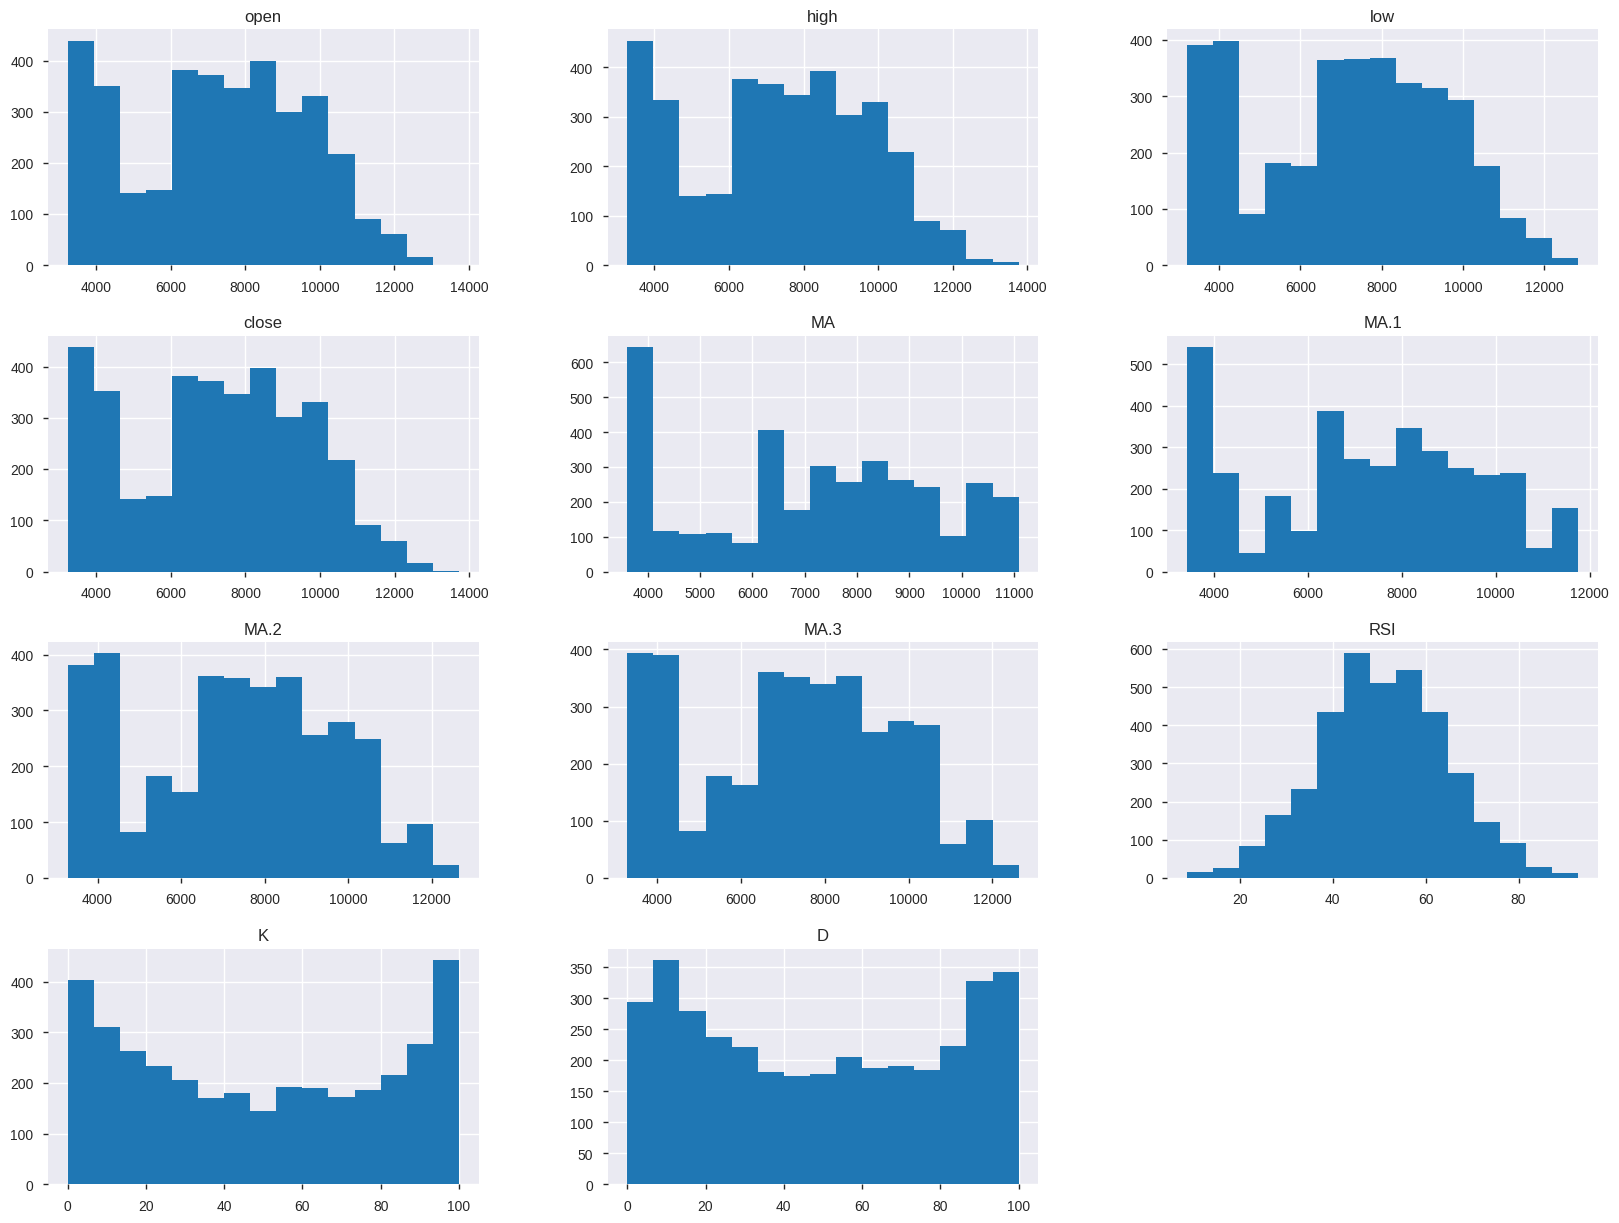

In [224]:
data.hist(bins=15, figsize=(20, 15));

Open, High, Low and Close are vary similar

## 2. Univariat Analysis

In [225]:
data.describe()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000
mean,7256.422586,7328.439361,7179.537046,7257.168714,7187.703203,7236.580709,7253.798060,7253.805382,50.787205,49.270664,49.270394
std,2377.729186,2406.393614,2344.268054,2377.964278,2249.900625,2344.113297,2372.055545,2369.700924,13.841571,33.028181,31.758930
min,3229.757472,3269.500000,3215.200000,3229.800000,3606.515430,3430.315938,3281.614525,3292.238637,8.603634,0.000000,0.000000
25%,5256.950000,5311.875181,5189.300000,5256.945656,5268.359596,5227.690881,5257.272317,5255.087239,41.647610,17.858526,19.260135
50%,7367.100000,7436.900000,7306.200000,7367.923467,7334.541018,7353.451875,7366.636422,7374.241616,50.689854,47.872668,48.160948
75%,9164.189882,9244.150000,9089.778888,9165.850000,8805.601551,9091.230920,9167.173636,9150.066760,60.172043,80.969780,79.870001
max,13729.000000,13764.000000,12833.000000,13728.000000,11089.764778,11759.839517,12656.682992,12625.026533,92.868197,100.000000,100.000000


### 2.1. Data skewnes

In [226]:
def skewnes_for_data(data):
  for col in data:
    skewnes = round(data[col].skew(), 2)
    print(col, '\t', skewnes)

In [227]:
skewnes_for_data(data.iloc[:, 1:])

open 	 -0.05
high 	 -0.04
low 	 -0.07
close 	 -0.05
MA 	 -0.12
MA.1 	 -0.08
MA.2 	 -0.06
MA.3 	 -0.06
RSI 	 0.01
K 	 0.06
D 	 0.07


Data is not so skewed

### 2.2. Ploting Data

For ploting the data we should set time as our index

In [228]:
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']
data.head()

,time,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
time,,,,,,,,,,,,
2018-09-30 08:00:00+00:00,2018-09-30 08:00:00+00:00,6584.4,6662.8,6576.000000,6631.7,6643.026619,6591.908333,6579.169969,6599.998605,54.260034,30.767330,28.144363
2018-09-30 12:00:00+00:00,2018-09-30 12:00:00+00:00,6633.9,6658.0,6586.300000,6608.8,6641.422119,6589.572333,6591.397894,6601.758884,51.951369,42.248441,33.161281
2018-09-30 16:00:00+00:00,2018-09-30 16:00:00+00:00,6607.4,6635.0,6589.919971,6606.0,6639.276619,6588.290333,6598.953449,6602.607107,51.661929,52.574710,41.863494
2018-09-30 20:00:00+00:00,2018-09-30 20:00:00+00:00,6606.0,6645.0,6529.600000,6622.4,6637.119119,6586.918333,6602.553449,6606.565686,53.302977,60.988082,51.937078
2018-10-01 00:00:00+00:00,2018-10-01 00:00:00+00:00,6622.3,6660.0,6621.800000,6645.0,6634.859119,6585.226333,6607.353449,6614.252549,55.542848,74.836135,62.799643


In [229]:
data = data.drop('time', axis=1)

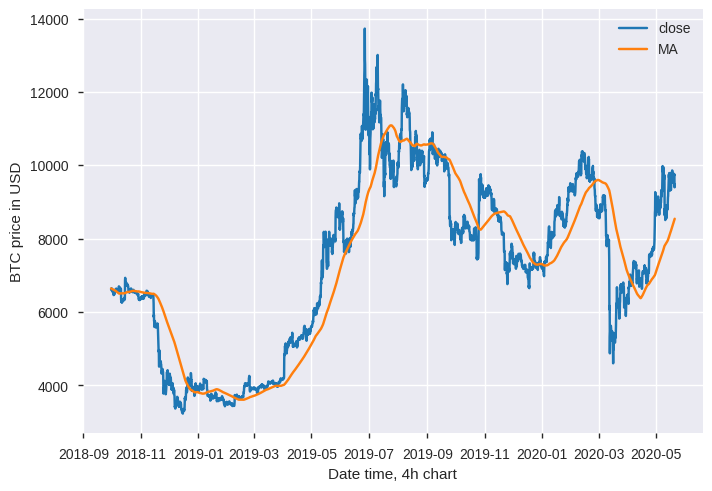

In [230]:
plt.plot(data['close'], label='close')
plt.plot(data['MA'], label='MA')
plt.xlabel('Date time, 4h chart')
plt.ylabel('BTC price in USD')
plt.legend()
plt.show()

## 3. Preparation for Neural Network

### 3.1. Story telling - problem description

We stil have no target variable so we should create it. We will build a model that will predict if we should Buy, Hold or Sell, so we have 3 States to predict.<br>
1. Buy if the price will change more then +0.5%
2. Hold if the price will not change more then -+0.5%
3. Sell if the price will drop more then -0.5%


We are going to calculate or target wariable based on 'close' price.

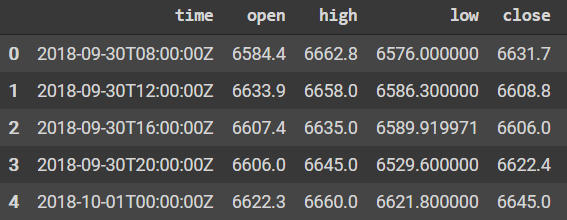

So if we have this data we are going to calculate our target price by subtraction of **close[1] - close[0]** and wwe are going to put this value in data[0] labaled as future price. <br>
In this case the calculation will be folowing 6608.8 - 6631.7 = -22,9<br>
So we are going to have a row with this values:

time	open	high	low	close	<br>
0	2018-09-30T08:00:00Z	6584.4	6662.8	6576.000000	6631.7



<table>
  <th>
    <tr>
      <td>time</td>
      <td>open</td>
      <td>high</td>
      <td>low</td>
      <td>close</td>
      <td>prediction</td>
      <td>prediction_precentage</td>
      <td>action</td>
    </tr>
  </th>
  <tr>
    <td>2018-09-30T08:00:00Z</td>
    <td>6584.4</td>
    <td>6662.8</td>
    <td>6576.000000</td>
    <td>6631.7</td>
    <td>-22.9</td>
    <td>-0.00345</td>
    <td>1</td>
  </tr>
</table>

In this case precentage change is -0.345 which means we take no action.

### 3.2. Generation target varaiable

In [231]:
data['prediction'] = 0.0
data['prediction_precentage'] = 0.0
data['action'] = 0
data.head()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D,prediction,prediction_precentage,action
time,,,,,,,,,,,,,,
2018-09-30 08:00:00+00:00,6584.4,6662.8,6576.000000,6631.7,6643.026619,6591.908333,6579.169969,6599.998605,54.260034,30.767330,28.144363,0.0,0.0,0
2018-09-30 12:00:00+00:00,6633.9,6658.0,6586.300000,6608.8,6641.422119,6589.572333,6591.397894,6601.758884,51.951369,42.248441,33.161281,0.0,0.0,0
2018-09-30 16:00:00+00:00,6607.4,6635.0,6589.919971,6606.0,6639.276619,6588.290333,6598.953449,6602.607107,51.661929,52.574710,41.863494,0.0,0.0,0
2018-09-30 20:00:00+00:00,6606.0,6645.0,6529.600000,6622.4,6637.119119,6586.918333,6602.553449,6606.565686,53.302977,60.988082,51.937078,0.0,0.0,0
2018-10-01 00:00:00+00:00,6622.3,6660.0,6621.800000,6645.0,6634.859119,6585.226333,6607.353449,6614.252549,55.542848,74.836135,62.799643,0.0,0.0,0


In [232]:
# making column 'predict'
end = data['close'].count()
for i in range(0, end):
  if i != 0:
    prediction = data['close'][i] - data['close'][i-1]
    #writing prediction price in 'prediciton' column
    data['prediction'][i-1] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [233]:
# making column 'prediction_precentage'
end = data['close'].count()
for i in range(0, end):
    #calculating % change
    prediction_precentage = data['prediction'][i] / data['close'][i]
    #writing predictionprecentage in column 'prediction_precentage
    data['prediction_precentage'][i] = prediction_precentage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [234]:
end = data['close'].count()
for i in range(0, end):
  if data['prediction_precentage'][i] >= 0.005:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 0')
    data['action'][i] = 0
  elif data['prediction_precentage'][i] <= -0.005:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 2')
    data['action'][i] = 2
  else:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 1')
    data['action'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 4. Data preprocesion

### 4.1. Removing last row(invalid)

In [235]:
data.tail()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D,prediction,prediction_precentage,action
time,,,,,,,,,,,,,,
2020-05-20 00:00:00+00:00,9770.10000,9791.300000,9710.1,9720.3,8493.2193,9407.103835,9667.559912,9683.644710,55.356962,40.616695,36.944582,39.0,0.004012,1
2020-05-20 04:00:00+00:00,9718.00000,9842.700000,9640.1,9759.3,8506.4423,9431.187835,9674.648800,9698.775768,56.810097,49.966842,42.564646,-37.4,-0.003832,1
2020-05-20 08:00:00+00:00,9759.32705,9795.902718,9712.5,9721.9,8519.5323,9451.351835,9675.434894,9703.400614,54.962487,47.801231,46.128256,-321.6,-0.033080,2
2020-05-20 12:00:00+00:00,9721.90000,9794.116549,9301.0,9400.3,8531.2273,9466.363835,9661.879338,9642.780491,42.240768,33.877965,43.882013,86.1,0.009159,0
2020-05-20 16:00:00+00:00,9400.30000,9533.500000,9334.9,9486.4,8543.1843,9480.155835,9654.479338,9611.504393,45.854169,24.582406,35.420534,0.0,0.000000,1


Last value has no prediction so we will drop it.

In [236]:
data.shape

(3591, 14)

In [237]:
data = data[:-1]

In [238]:
data.shape

(3590, 14)

### 4.2. Spliting X and y

In [239]:
 X = data[['open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D', 'prediction', 'prediction_precentage']].values
 X

array([[ 6.58440000e+03,  6.66280000e+03,  6.57600000e+03, ...,
         2.81443630e+01, -2.29000000e+01, -3.45311157e-03],
       [ 6.63390000e+03,  6.65800000e+03,  6.58630000e+03, ...,
         3.31612810e+01, -2.80000000e+00, -4.23677521e-04],
       [ 6.60740000e+03,  6.63500000e+03,  6.58991997e+03, ...,
         4.18634940e+01,  1.64000000e+01,  2.48259158e-03],
       ...,
       [ 9.71800000e+03,  9.84270000e+03,  9.64010000e+03, ...,
         4.25646455e+01, -3.74000000e+01, -3.83224207e-03],
       [ 9.75932705e+03,  9.79590272e+03,  9.71250000e+03, ...,
         4.61282562e+01, -3.21600000e+02, -3.30799535e-02],
       [ 9.72190000e+03,  9.79411655e+03,  9.30100000e+03, ...,
         4.38820127e+01,  8.61000000e+01,  9.15928215e-03]])

In [240]:
y = data[['action']].values
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [2],
       [0]])

In [241]:
X.shape

(3590, 13)

In [242]:
y.shape

(3590, 1)

### 4.3. Spliting traning and testing data

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [244]:
X_train.shape

(2872, 13)

In [245]:
y_train.shape

(2872, 1)

In [246]:
X_test.shape

(718, 13)

In [247]:
y_test.shape

(718, 1)

### 4.4. Data standardization

In [248]:
scaler = StandardScaler()

In [249]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 5. Building an Artificial Neural Network